In [1]:
import torch

def uniformity(x, t=2):
    return torch.pdist(x, p=2).pow(2).mul(-t).exp().mean().log()

def tolerance(x, l):
    total_distances = 0.0
    for i in range(int(l.min()), int(l.max()) + 1):
        cur_features = x[(l == i).nonzero(as_tuple=True)[0]]
        distances = torch.mm(cur_features, cur_features.T)
        mask = torch.ones((cur_features.shape[0], cur_features.shape[0])) - torch.eye(cur_features.shape[0])
        masked_distances = distances * mask
        total_distances += masked_distances.mean()
    return total_distances.mean() / (1 + l.max() - l.min())

datasets = ['aircraft', 'cars', 'cub', 'dogs', 'flowers', 'nabirds', 'imagenet']
backbones = ['btwins_r50_1000', 'dcv2_r50_800', 'moco_r50_800', 'simclr_r50_800', 'simsiam_r50_100', 'supervised_r50', 'swav_r50_800']

results = {}
for dataset in datasets:
    if dataset not in results:
        results[dataset] = {}
    print(f'Dataset: {dataset}')
    for backbone in backbones:
        if backbone not in results[dataset]:
            results[dataset][backbone] = {}
        print(f'Backbone: {backbone}')
        features_path = '/vulcanscratch/mgwillia/vissl/features/' + '_'.join([backbone, dataset, 'features']) + '.pth.tar'
        features = torch.load(features_path)
        targets_path = '/vulcanscratch/mgwillia/vissl/features/' + '_'.join([backbone, dataset, 'targets']) + '.pth.tar'
        targets = torch.load(targets_path)

        #val_features = features['val_features']
        val_features = torch.nn.functional.normalize(features['val_features'], p=2, dim=1)
        val_targets = targets['val_targets']
        unif = uniformity(val_features, t=2) * -1
        tol = tolerance(val_features, val_targets)
        results[dataset][backbone]['uniformity'] = unif.item()
        results[dataset][backbone]['tolerance'] = tol.item()
        print(unif)
        print(tol)
    print('')

Dataset: aircraft
Backbone: btwins_r50_1000
tensor(1.3353)
tensor(0.6672)
Backbone: dcv2_r50_800
tensor(0.8629)
tensor(0.7770)
Backbone: moco_r50_800
tensor(0.6941)
tensor(0.7946)
Backbone: simclr_r50_800
tensor(1.0855)
tensor(0.7077)
Backbone: simsiam_r50_100
tensor(0.8975)
tensor(0.7649)
Backbone: supervised_r50
tensor(0.6194)
tensor(0.8444)
Backbone: swav_r50_800
tensor(1.0141)
tensor(0.7362)

Dataset: cars
Backbone: btwins_r50_1000
tensor(1.7725)
tensor(0.5848)
Backbone: dcv2_r50_800
tensor(0.9513)
tensor(0.7680)
Backbone: moco_r50_800
tensor(1.2052)
tensor(0.7072)
Backbone: simclr_r50_800
tensor(1.5413)
tensor(0.6349)
Backbone: simsiam_r50_100
tensor(1.1204)
tensor(0.7223)
Backbone: supervised_r50
tensor(0.8423)
tensor(0.8165)
Backbone: swav_r50_800
tensor(1.1016)
tensor(0.7319)

Dataset: cub
Backbone: btwins_r50_1000
tensor(2.2282)
tensor(0.5255)
Backbone: dcv2_r50_800
tensor(1.1558)
tensor(0.7357)
Backbone: moco_r50_800
tensor(1.7000)
tensor(0.6492)
Backbone: simclr_r50_800
tens

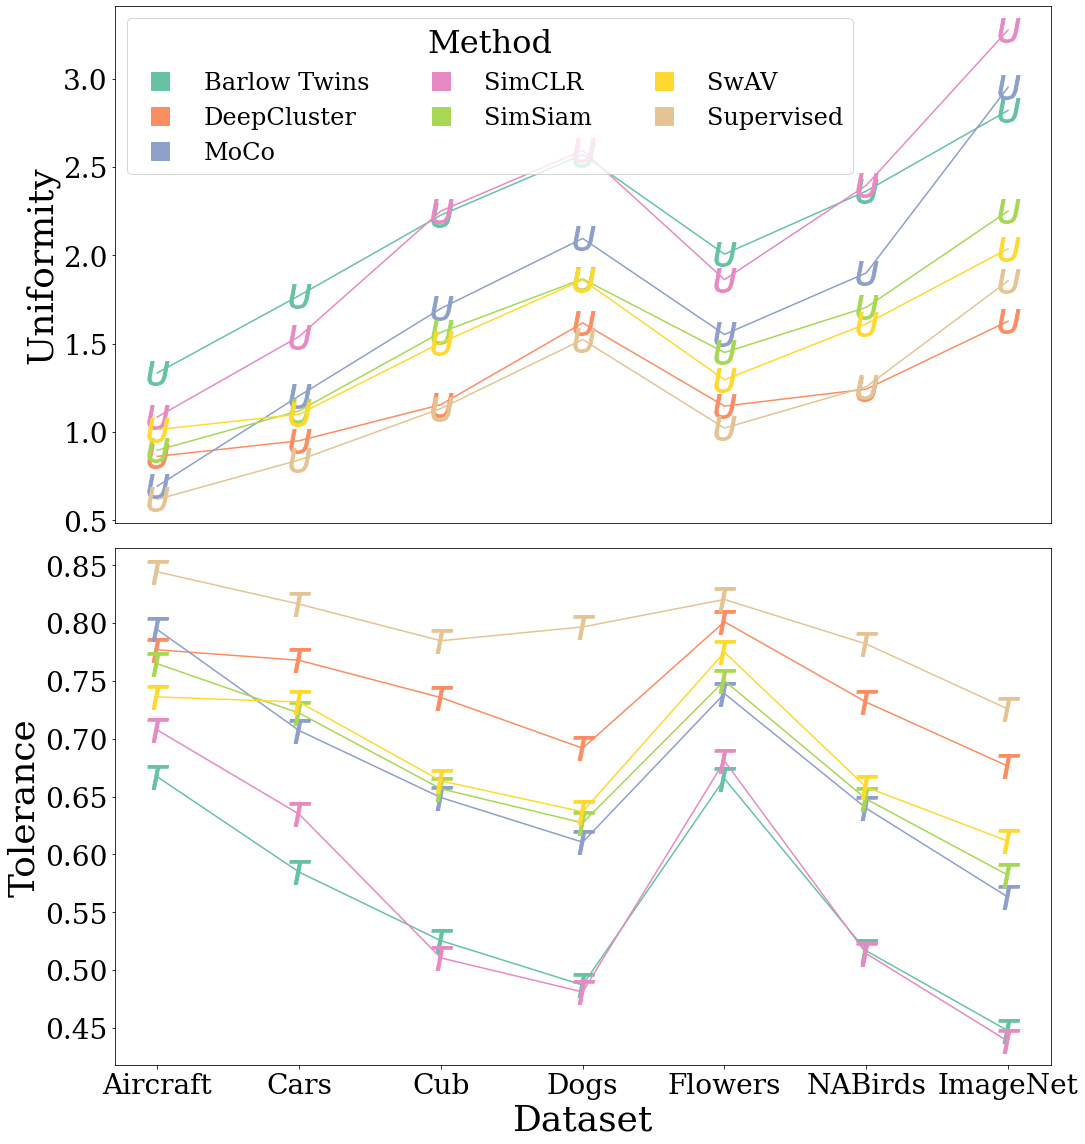

In [9]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (15,16)
plt.rcParams["font.family"] = "serif"
cmap = plt.get_cmap('Set2')
colormap = np.array(list(cmap.colors))

title_size = 32
tick_size = 28

datasets = ['aircraft', 'cars', 'flowers', 'cub', 'nabirds', 'dogs', 'imagenet']
method_names = ['Barlow Twins', 'DeepCluster', 'MoCo', 'SimCLR', 'SimSiam', 'SwAV', 'Supervised']
backbones = ['btwins_r50_1000', 'dcv2_r50_800', 'moco_r50_800', 'simclr_r50_800', 'simsiam_r50_100', 'swav_r50_800', 'supervised_r50']
datasets = ['Aircraft', 'Cars', 'Cub', 'Dogs', 'Flowers', 'NABirds', 'ImageNet']

fig, axs = plt.subplots(2, 1)
for i, backbone in enumerate(backbones):
    uniformities = []
    tolerances = []
    for j, dataset in enumerate(datasets):
        uniformities.append(results[dataset.lower()][backbone]['uniformity'])
        tolerances.append(results[dataset.lower()][backbone]['tolerance'])
    axs[0].plot(uniformities, marker="$U$", markersize=24, c=colormap[i], label=backbone)
    axs[1].plot(tolerances, marker="$T$", markersize=24, c=colormap[i])
    
axs[0].set_xticks([])
axs[1].set_xticks(list(range(0, len(datasets))))
axs[1].set_xticklabels(datasets)

f = lambda m,c: plt.plot([],[],marker=m, markersize=18, color=c, ls="none")[0]
handles = [f("s", colormap[i]) for i in range(7)]
axs[0].legend(handles,
          method_names,
          title='Method',
          title_fontsize=title_size,
          scatterpoints=1,
          ncol=3,
          fontsize=24)

axs[1].set_xlabel('Dataset', fontsize=36)
axs[0].set_ylabel('Uniformity', fontsize=36)
axs[1].set_ylabel('Tolerance', fontsize=36)

axs[0].tick_params(axis='both', which='major', labelsize=tick_size)
axs[0].tick_params(axis='both', which='minor', labelsize=tick_size)
axs[1].tick_params(axis='both', which='major', labelsize=tick_size)
axs[1].tick_params(axis='both', which='minor', labelsize=tick_size)
    
fig.tight_layout()
plt.savefig('uniformity_tolerance_curves.pdf', bbox_inches = 'tight',
    pad_inches = 0.1)

In [ ]:
#### TODO: MAKE UNIFORMITY divided by TOLERANCE CURVE INSTEAD ####